In [1]:
import pandas as pd
from statistics import variance
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from scipy.stats import ttest_1samp
from scipy.stats import t



In [2]:
sensor_a = pd.read_excel('./hw_1_data/HEAT - A_final.xls', skiprows = 3).drop([0])
sensor_b = pd.read_excel('./hw_1_data/HEAT - B_final.xls', skiprows = 3).drop([0])
sensor_c = pd.read_excel('./hw_1_data/HEAT - C_final.xls', skiprows = 3).drop([0])
sensor_d = pd.read_excel('./hw_1_data/HEAT - D_final.xls', skiprows = 3).drop([0])
sensor_e = pd.read_excel('./hw_1_data/HEAT - E_final.xls', skiprows = 3).drop([0])

In [3]:
to_numeric_columns = ['Direction ‚ True', 'Wind Speed',
       'Crosswind Speed', 'Headwind Speed', 'Temperature', 'Globe Temperature',
       'Wind Chill', 'Relative Humidity', 'Heat Stress Index', 'Dew Point',
       'Psychro Wet Bulb Temperature', 'Station Pressure',
       'Barometric Pressure', 'Altitude', 'Density Altitude',
       'NA Wet Bulb Temperature', 'WBGT', 'TWL', 'Direction ‚ Mag']

In [4]:
sensor_a[to_numeric_columns] = sensor_a[to_numeric_columns].apply(pd.to_numeric)
sensor_a['FORMATTED DATE-TIME'] = pd.to_datetime(sensor_a['FORMATTED DATE-TIME'])
#sensor_a.set_index('FORMATTED DATE-TIME')

In [5]:
sensor_b[to_numeric_columns] = sensor_b[to_numeric_columns].apply(pd.to_numeric)
sensor_b['FORMATTED DATE-TIME'] = pd.to_datetime(sensor_b['FORMATTED DATE-TIME'])
#sensor_b.set_index('FORMATTED DATE-TIME')

In [6]:
sensor_c[to_numeric_columns] = sensor_c[to_numeric_columns].apply(pd.to_numeric)
sensor_c['FORMATTED DATE-TIME'] = pd.to_datetime(sensor_c['FORMATTED DATE-TIME'])
#sensor_c.set_index('FORMATTED DATE-TIME')

In [7]:
sensor_d[to_numeric_columns] = sensor_d[to_numeric_columns].apply(pd.to_numeric)
sensor_d['FORMATTED DATE-TIME'] = pd.to_datetime(sensor_d['FORMATTED DATE-TIME'])
#sensor_d.set_index('FORMATTED DATE-TIME')

In [8]:
sensor_e[to_numeric_columns] = sensor_e[to_numeric_columns].apply(pd.to_numeric)
sensor_e['FORMATTED DATE-TIME'] = pd.to_datetime(sensor_e['FORMATTED DATE-TIME'])
#sensor_e.set_index('FORMATTED DATE-TIME')

In [9]:
print(sensor_a.isna().sum())
print(sensor_b.isna().sum())
print(sensor_c.isna().sum())
print(sensor_d.isna().sum())
print(sensor_e.isna().sum())

# No NAN values in sensor lists 

FORMATTED DATE-TIME             0
Direction ‚ True                0
Wind Speed                      0
Crosswind Speed                 0
Headwind Speed                  0
Temperature                     0
Globe Temperature               0
Wind Chill                      0
Relative Humidity               0
Heat Stress Index               0
Dew Point                       0
Psychro Wet Bulb Temperature    0
Station Pressure                0
Barometric Pressure             0
Altitude                        0
Density Altitude                0
NA Wet Bulb Temperature         0
WBGT                            0
TWL                             0
Direction ‚ Mag                 0
dtype: int64
FORMATTED DATE-TIME             0
Direction ‚ True                0
Wind Speed                      0
Crosswind Speed                 0
Headwind Speed                  0
Temperature                     0
Globe Temperature               0
Wind Chill                      0
Relative Humidity               0
H

In [45]:
if sensor_a.isnull().values.ravel().sum() and sensor_b.isnull().values.ravel().sum() and sensor_c.isnull().values.ravel().sum() and sensor_d.isnull().values.ravel().sum() and sensor_e.isnull().values.ravel().sum():
    print('No NaN values in dataset')
else: 
    print('NaN values in dataset')




NaN values in dataset


In [10]:
sensor_list = [sensor_a, sensor_b, sensor_c, sensor_d, sensor_e]
name_list = ['sensor_a','sensor_b', 'sensor_c', 'sensor_d', 'sensor_e']

In [11]:
i = 0
mean_dict = {} 
for sensor in sensor_list:
    mean_list = [] 
    sensor_name = name_list[i]
    for measurement in to_numeric_columns:
        mean = round(sensor[measurement].mean(),3)
        mean_list.append(mean)
    mean_dict.update({sensor_name : mean_list})
    i += 1

mean_df = pd.DataFrame.from_dict(mean_dict, orient = 'index', columns = to_numeric_columns)
mean_df2 = mean_df.transpose()
mean_df2.to_csv('mean_variables.csv')   

In [12]:
mean_df2

,sensor_a,sensor_b,sensor_c,sensor_d,sensor_e
Direction ‚ True,209.406,183.412,183.589,198.327,223.956
Wind Speed,1.290,1.242,1.371,1.582,0.596
Crosswind Speed,0.965,0.836,0.963,1.211,0.439
Headwind Speed,0.164,-0.130,-0.263,-0.301,0.195
Temperature,17.969,18.065,17.913,17.996,18.354
Globe Temperature,21.545,21.799,21.587,21.359,21.176
Wind Chill,17.838,17.946,17.773,17.835,18.294
Relative Humidity,78.185,77.878,77.963,77.942,76.793
Heat Stress Index,17.900,18.004,17.828,17.922,18.286
Dew Point,13.554,13.531,13.458,13.509,13.559


In [13]:
i = 0
var_dict = {} 
for sensor in sensor_list:
    var_list = [] 
    sensor_name = name_list[i]
    for measurement in to_numeric_columns:
        var = round(variance(sensor[measurement]), 3)
        var_list.append(var)
    var_dict.update({sensor_name : var_list})
    i += 1

var_df = pd.DataFrame.from_dict(var_dict, orient = 'index', columns = to_numeric_columns)
var_df2 = var_df.transpose()
var_df2.to_csv('variance_variables.csv')   
    

In [14]:
var_df_2

,sensor_a,sensor_b,sensor_c,sensor_d,sensor_e
Direction ‚ True,10108.940,9977.218,7703.363,8133.890,9308.285
Wind Speed,1.251,1.302,1.431,1.740,0.511
Crosswind Speed,0.927,0.879,1.043,1.452,0.316
Headwind Speed,1.035,1.257,1.272,1.233,0.319
Temperature,15.864,16.629,16.105,16.106,19.043
Globe Temperature,68.191,66.049,67.941,61.202,63.216
Wind Chill,16.264,17.036,16.541,16.557,19.137
Relative Humidity,376.010,408.623,374.623,389.856,406.494
Heat Stress Index,14.997,15.439,15.356,15.118,18.475
Dew Point,9.723,9.637,10.084,10.072,9.423


In [15]:
i = 0
std_dict = {} 
for sensor in sensor_list:
    std_list = [] 
    sensor_name = name_list[i]
    for measurement in to_numeric_columns:
        stdev = round(np.std(sensor[measurement]),3)
        std_list.append(stdev)
    std_dict.update({sensor_name : std_list})
    i += 1

std_df = pd.DataFrame.from_dict(std_dict, orient = 'index', columns = to_numeric_columns)
std_df2 = std_df.transpose()
std_df2.to_csv('std_variables.csv')   

In [16]:
std_df2

,sensor_a,sensor_b,sensor_c,sensor_d,sensor_e
Direction ‚ True,100.523,99.866,87.751,90.170,96.460
Wind Speed,1.118,1.141,1.196,1.319,0.715
Crosswind Speed,0.962,0.937,1.021,1.205,0.562
Headwind Speed,1.017,1.121,1.127,1.110,0.565
Temperature,3.982,4.077,4.012,4.012,4.363
Globe Temperature,8.256,8.125,8.241,7.822,7.949
Wind Chill,4.032,4.127,4.066,4.068,4.374
Relative Humidity,19.387,20.210,19.351,19.741,20.158
Heat Stress Index,3.872,3.928,3.918,3.887,4.297
Dew Point,3.118,3.104,3.175,3.173,3.069


In [17]:
Wind_speed = pd.concat([sensor_a['Wind Speed'], sensor_b['Wind Speed'], sensor_c['Wind Speed'],
                       sensor_d['Wind Speed'], sensor_e['Wind Speed']], 
                       axis=1, keys=['A', 'B', 'C', 'D', 'E'])

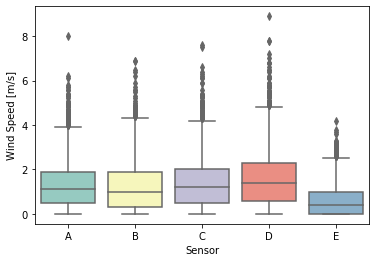

In [34]:
ax = sns.boxplot(data=Wind_speed, palette="Set3")
ax.set(xlabel = 'Sensor', ylabel = 'Wind Speed [m/s]')
plt.savefig('Boxplot of wind speed')

In [19]:
Temperature = pd.concat([sensor_a['Temperature'], sensor_b['Temperature'], sensor_c['Temperature'],
                       sensor_d['Temperature'], sensor_e['Temperature']], 
                       axis=1, keys=['A', 'B', 'C', 'D', 'E']).dropna()

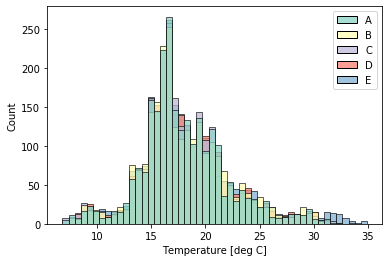

In [20]:

ax = sns.histplot(data=Temperature, bins = 50, palette="Set3", multiple="stack")
ax.set(xlabel = 'Temperature [deg C]')
plt.savefig('Histogram of temperature per sensor with 50 bins')

plt.show()


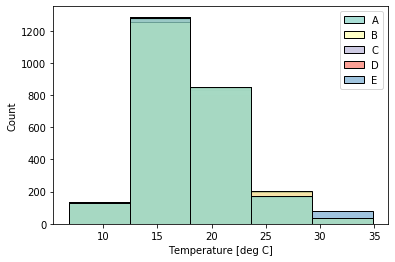

In [28]:
ax = sns.histplot(data=Temperature, bins = 5, palette="Set3", multiple="stack")
ax.set(xlabel = 'Temperature [deg C]')

plt.savefig('Histogram of temperature per sensor with 5 bins')

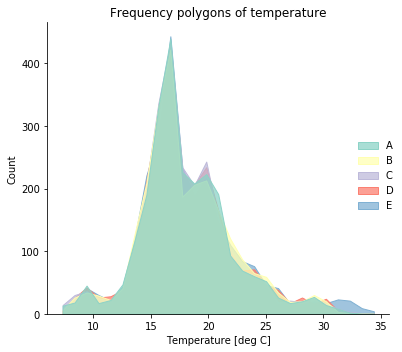

In [29]:
ax = sns.displot(data=Temperature, element = 'poly', palette="Set3", bins = 27)
ax.set(title = 'Frequency polygons of temperature', xlabel = 'Temperature [deg C]')
plt.tight_layout()
plt.savefig('polygon hist temperature')

In [30]:
wind_direction = pd.concat([sensor_a['Direction ‚ True'], sensor_b['Direction ‚ True'], 
                        sensor_c['Direction ‚ True'], sensor_d['Direction ‚ True'], 
                        sensor_e['Direction ‚ True']], 
                       axis=1, keys=['A', 'B', 'C', 'D', 'E'])

In [31]:
wind_direction

,A,B,C,D,E
1,327.0,346,4.0,334.0,62.0
2,323.0,351,5.0,334.0,72.0
3,325.0,15,6.0,333.0,73.0
4,322.0,16,3.0,331.0,73.0
5,321.0,21,4.0,332.0,232.0
...,...,...,...,...,...
2472,140.0,163,165.0,154.0,250.0
2473,144.0,133,164.0,153.0,250.0
2474,141.0,107,143.0,162.0,250.0
2475,160.0,127,NaN,NaN,248.0


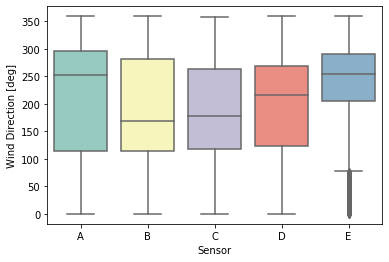

In [33]:
ax = sns.boxplot(data=wind_direction, palette="Set3")
ax.set(xlabel = 'Sensor', ylabel = 'Wind Direction [deg]')
plt.savefig('Boxplot of the wind direction') 

In [ ]:
ax = sns.boxplot(data=Temperature, palette="Set3")
ax.set(xlabel = 'Sensor', ylabel = 'Temperature [deg C]', 
       title = 'Boxplot of temperature in degrees C per sensor')
plt.savefig('Boxplot of temperature') 

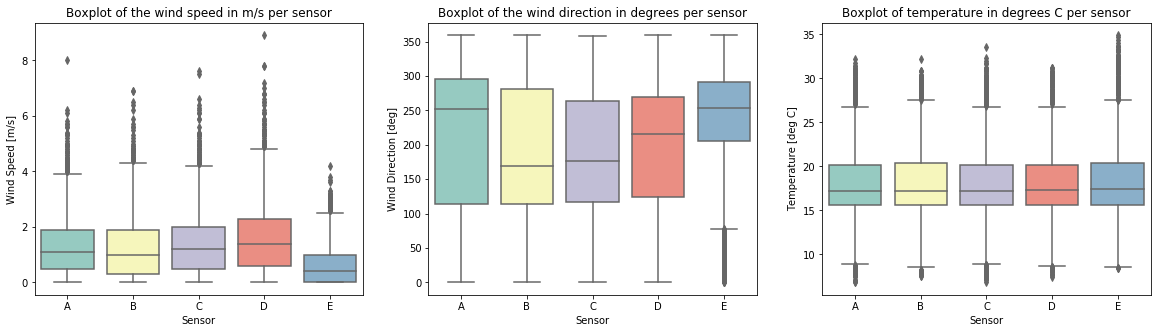

In [129]:
fig , axes = plt.subplots(nrows = 1, ncols = 3, figsize=(20,5))

plt.sca(axes[0])
ax = sns.boxplot(data=Wind_speed, palette="Set3")
ax.set(xlabel = 'Sensor', ylabel = 'Wind Speed [m/s]', 
      title = 'Boxplot of the wind speed in m/s per sensor')

plt.sca(axes[1])
ax = sns.boxplot(data=wind_direction, palette="Set3")
ax.set(xlabel = 'Sensor', ylabel = 'Wind Direction [deg]',
      title = 'Boxplot of the wind direction in degrees per sensor') 

plt.sca(axes[2])
ax = sns.boxplot(data=Temperature, palette="Set3")
ax.set(xlabel = 'Sensor', ylabel = 'Temperature [deg C]', 
       title = 'Boxplot of temperature in degrees C per sensor')
 
plt.savefig('Boxplots') 


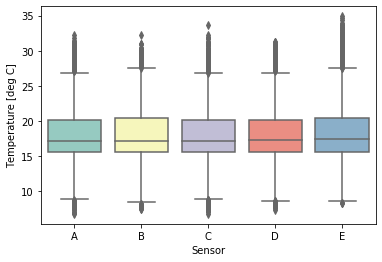

In [35]:
ax = sns.boxplot(data=Temperature, palette="Set3")
ax.set(xlabel = 'Sensor', ylabel = 'Temperature [deg C]')
plt.savefig('Boxplot of temperature') 

## A2

##### Temperature

In [37]:
pmf_a = sensor_a['Temperature'].value_counts().sort_index() / len(sensor_a['Temperature'])
pmf_b = sensor_b['Temperature'].value_counts().sort_index() / len(sensor_b['Temperature'])
pmf_c = sensor_c['Temperature'].value_counts().sort_index() / len(sensor_c['Temperature'])
pmf_d = sensor_d['Temperature'].value_counts().sort_index() / len(sensor_d['Temperature'])
pmf_e = sensor_e['Temperature'].value_counts().sort_index() / len(sensor_e['Temperature'])

In [38]:
#df1 = pd.DataFrame(data=pmf_as.index, columns=['Temperature [deg C]'])
#df2 = pd.DataFrame(data=pmf_as.values, columns=['P'])
#pmf_a = pd.merge(df1, df2, left_index=True, right_index=True)

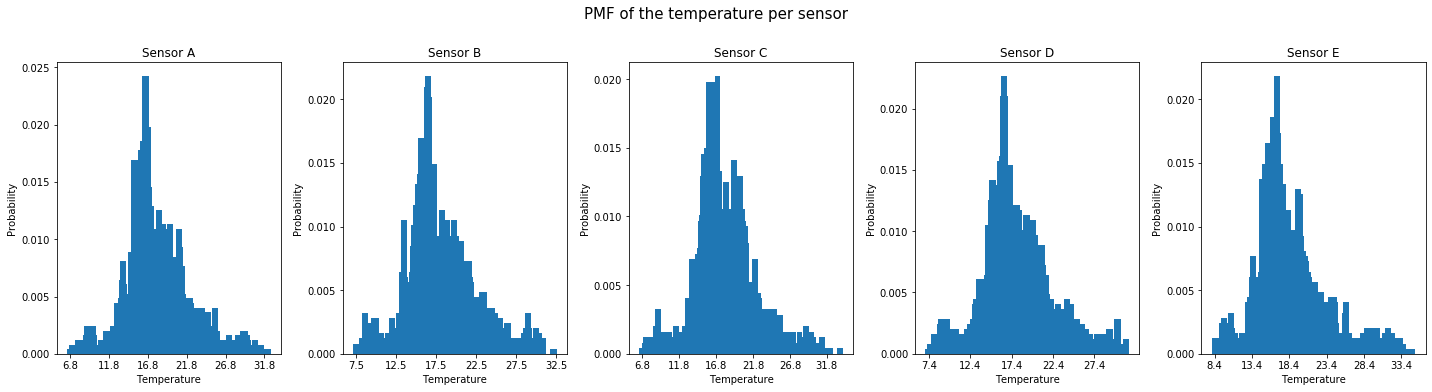

In [39]:
fig , axes = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))
plt.sca(axes[0])
plt.bar(pmf_a.index, pmf_a.values)
plt.title('Sensor A')
plt.xlabel('Temperature')
plt.ylabel('Probability')
plt.xticks(np.arange(min(sensor_a.Temperature), max(sensor_a.Temperature)+1, 5.0))


plt.sca(axes[1])
plt.bar(pmf_b.index, pmf_b.values)
plt.title('Sensor B')
plt.xlabel('Temperature')
plt.ylabel('Probability')
plt.xticks(np.arange(min(sensor_b.Temperature), max(sensor_b.Temperature)+1, 5.0))

plt.sca(axes[2])
plt.bar(pmf_c.index, pmf_c.values)
plt.title('Sensor C')
plt.xlabel('Temperature')
plt.ylabel('Probability')
plt.xticks(np.arange(min(sensor_c.Temperature), max(sensor_c.Temperature)+1, 5.0))
plt.yticks([0.000, 0.005, 0.010, 0.015, 0.020])

plt.sca(axes[3])
plt.bar(pmf_d.index, pmf_d.values)
plt.title('Sensor D')
plt.xlabel('Temperature')
plt.ylabel('Probability')
plt.xticks(np.arange(min(sensor_d.Temperature), max(sensor_d.Temperature)+1, 5.0))

plt.sca(axes[4])
plt.bar(pmf_e.index, pmf_e.values)
plt.title('Sensor E')
plt.xlabel('Temperature [deg C]')
plt.ylabel('Probability')
plt.xticks(np.arange(min(sensor_e.Temperature), max(sensor_e.Temperature)+1, 5.0))


fig.suptitle('PMF of the temperature per sensor', fontsize = 15, y = 1.08)
plt.tight_layout()
plt.savefig('PMF of temperature per sensor') 

#### PDF

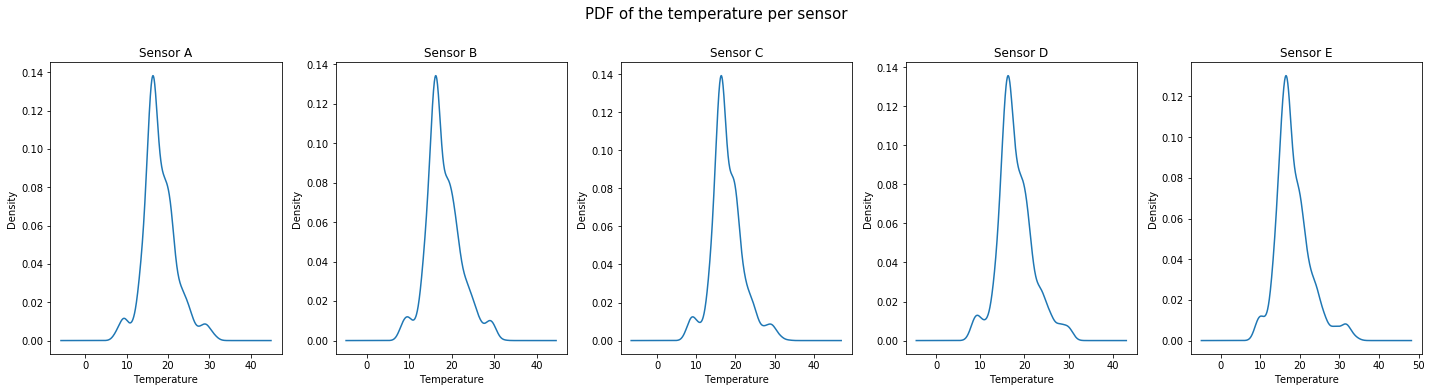

In [30]:
fig , axes = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))
plt.sca(axes[0])
ax = sensor_a['Temperature'].plot(kind='density')
ax.set(xlabel = 'Temperature')
plt.title('Sensor A')

plt.sca(axes[1])
ax = sensor_b['Temperature'].plot(kind='density')
ax.set(xlabel = 'Temperature')
plt.title('Sensor B')

plt.sca(axes[2])
ax = sensor_c['Temperature'].plot(kind='density')
ax.set(xlabel = 'Temperature')
plt.title('Sensor C')

plt.sca(axes[3])
ax = sensor_d['Temperature'].plot(kind='density')
ax.set(xlabel = 'Temperature')
plt.title('Sensor D')

plt.sca(axes[4])
ax = sensor_e['Temperature'].plot(kind='density')
ax.set(xlabel = 'Temperature')
plt.title('Sensor E')

plt.tight_layout()
fig.suptitle('PDF of the temperature per sensor', fontsize = 15, y = 1.08)

plt.savefig('PDF of temperature per sensor') 

### CDF

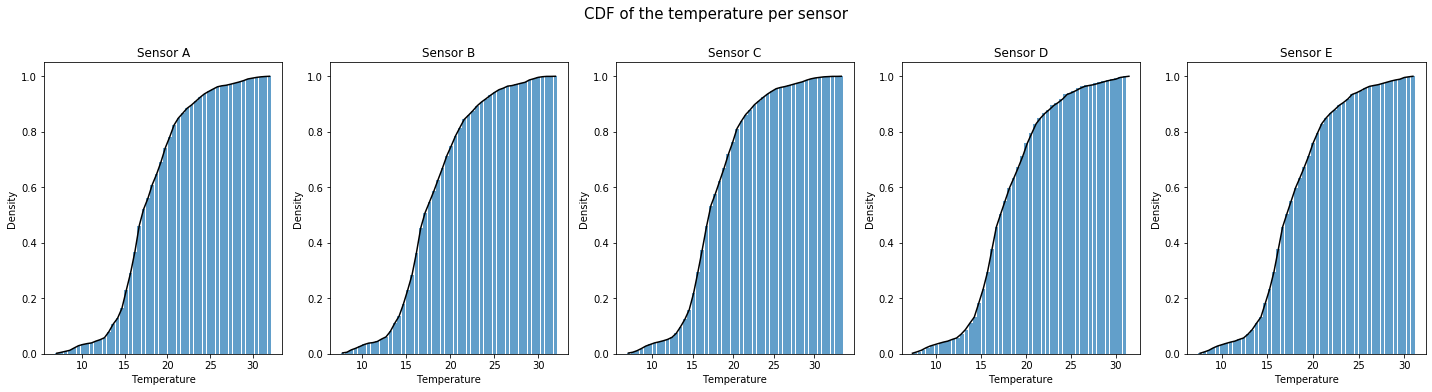

In [31]:
fig , axes = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))
plt.sca(axes[0])
a1 = plt.hist(x=sensor_a['Temperature'], bins=50, cumulative=True, density = True, alpha=0.7, rwidth=0.85)
plt.plot(a1[1][1:]-(a1[1][1:]-a1[1][:-1])/2,a1[0], color='k')
plt.title('Sensor A')
plt.xlabel('Temperature')
plt.ylabel('Density')

plt.sca(axes[1])
b1 = plt.hist(x=sensor_b['Temperature'], bins=50, cumulative=True, density = True, alpha=0.7, rwidth=0.85)
plt.plot(b1[1][1:]-(b1[1][1:]-b1[1][:-1])/2,b1[0], color='k')
plt.title('Sensor B')
plt.xlabel('Temperature')
plt.ylabel('Density')

plt.sca(axes[2])
c1 = plt.hist(x=sensor_c['Temperature'], bins=50, cumulative=True, density = True, alpha=0.7, rwidth=0.85)
plt.plot(c1[1][1:]-(c1[1][1:]-c1[1][:-1])/2,c1[0], color='k')
plt.title('Sensor C')
plt.xlabel('Temperature')
plt.ylabel('Density')

plt.sca(axes[3])
d1 = plt.hist(x=sensor_d['Temperature'], bins=50, cumulative=True, density = True ,alpha=0.7, rwidth=0.85)
plt.plot(d1[1][1:]-(d1[1][1:]-a1[1][:-1])/2,d1[0], color='k')
plt.title('Sensor D')
plt.xlabel('Temperature')
plt.ylabel('Density')

plt.sca(axes[4])
e1 = plt.hist(x=sensor_d['Temperature'], bins=50, cumulative=True, density = True, alpha=0.7, rwidth=0.85)
plt.plot(e1[1][1:]-(e1[1][1:]-e1[1][:-1])/2,e1[0], color='k')
plt.title('Sensor E')
plt.xlabel('Temperature')
plt.ylabel('Density')

plt.tight_layout()
fig.suptitle('CDF of the temperature per sensor', fontsize = 15, y = 1.08)
plt.savefig('CDF of temperature per sensor') 

### Windspeed

/Users/louise/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/louise/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/louise/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

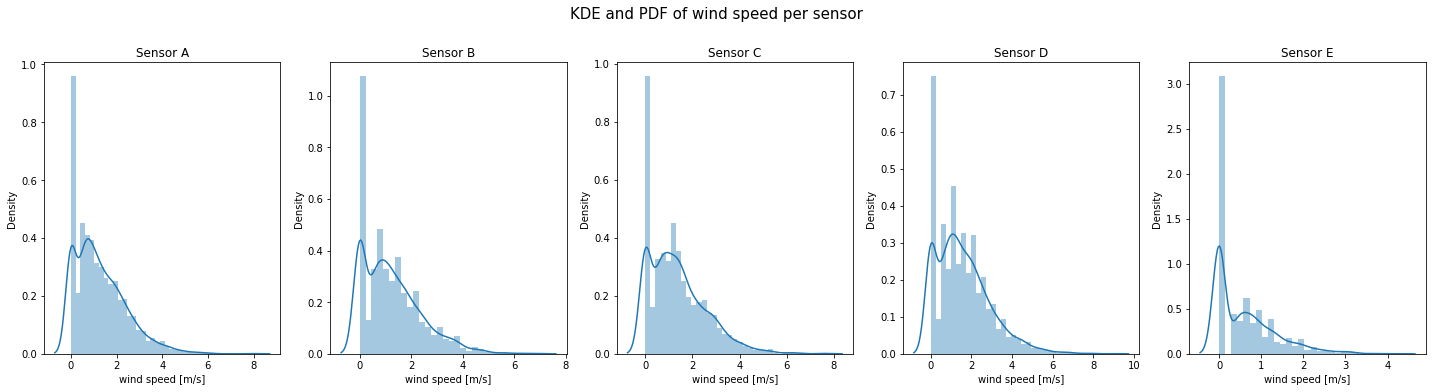

In [32]:
fig , axes = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))

plt.sca(axes[0])
ax = sns.distplot(Wind_speed.A, kde = True, norm_hist = True)
ax.set(xlabel = 'wind speed [m/s]')
plt.title('Sensor A')

plt.sca(axes[1])
ax = sns.distplot(Wind_speed.B, kde = True, norm_hist = True)
ax.set(xlabel = 'wind speed [m/s]')
plt.title('Sensor B')

plt.sca(axes[2])
ax = sns.distplot(Wind_speed.C, kde = True, norm_hist = True)
ax.set(xlabel = 'wind speed [m/s]')
plt.title('Sensor C')

plt.sca(axes[3])
ax = sns.distplot(Wind_speed.D, kde = True, norm_hist = True)
ax.set(xlabel = 'wind speed [m/s]')
plt.title('Sensor D')

plt.sca(axes[4])
ax = sns.distplot(Wind_speed.E, kde = True, norm_hist = True)
ax.set(xlabel = 'wind speed [m/s]')
plt.title('Sensor E')

plt.tight_layout()
fig.suptitle('KDE and PDF of wind speed per sensor', fontsize = 15, y = 1.08)

plt.savefig('KDE and PDF of wind speed per sensor') 

### A3

make of equal lenght 

In [48]:
Wet_Bulb_Globe = pd.concat([sensor_a['WBGT'], sensor_b['WBGT'], 
                        sensor_c['WBGT'], sensor_d['WBGT'], 
                        sensor_e['WBGT']], 
                       axis=1, keys=['A', 'B', 'C', 'D', 'E']).dropna()

In [49]:
Crosswind_speed = pd.concat([sensor_a['Crosswind Speed'], sensor_b['Crosswind Speed'], 
                        sensor_c['Crosswind Speed'], sensor_d['Crosswind Speed'], 
                        sensor_e['Crosswind Speed']], 
                       axis=1, keys=['A', 'B', 'C', 'D', 'E']).dropna()

In [50]:
# make correlations 

In [51]:
sensor_list = ['A', 'B', 'C', 'D', 'E']
pearson_dict_W = {} 
spearman_dict_W = {} 

while len(sensor_list) > 1:
    sensor1 = sensor_list[0]
    for sensor2 in sensor_list:
        if sensor1 != sensor2: 
            pearson, _ = stats.pearsonr(Wet_Bulb_Globe[sensor1], Wet_Bulb_Globe[sensor2])
            key = str(sensor1) + 'x' + str(sensor2)
            pearson_dict_W[key] = pearson

            spearman, _ = stats.spearmanr(Wet_Bulb_Globe[sensor1], Wet_Bulb_Globe[sensor2])
            key = str(sensor1) + 'x' + str(sensor2)
            spearman_dict_W[key] = spearman
    sensor_list.remove(sensor1)
        

In [52]:
sensor_list = ['A', 'B', 'C', 'D', 'E']
pearson_dict_T = {} 
spearman_dict_T = {} 

while len(sensor_list) > 1:
    sensor1 = sensor_list[0]
    for sensor2 in sensor_list:
        if sensor1 != sensor2: 
            pearson, _ = stats.pearsonr(Temperature[sensor1], Temperature[sensor2])
            key = str(sensor1) + 'x' + str(sensor2)
            pearson_dict_T[key] = pearson
            
            spearman, _ = stats.spearmanr(Temperature[sensor1], Temperature[sensor2])
            key = str(sensor1) + 'x' + str(sensor2)
            spearman_dict_T[key] = spearman
    sensor_list.remove(sensor1)

In [53]:
sensor_list = ['A', 'B', 'C', 'D', 'E']
pearson_dict_C = {} 
spearman_dict_C = {} 

while len(sensor_list) > 1:
    sensor1 = sensor_list[0]
    for sensor2 in sensor_list:
        if sensor1 != sensor2: 
            pearson, _ = stats.pearsonr(Crosswind_speed[sensor1], Crosswind_speed[sensor2])
            key = str(sensor1) + 'x' + str(sensor2)
            pearson_dict_C[key] = pearson

            spearman, _ = stats.spearmanr(Crosswind_speed[sensor1], Crosswind_speed[sensor2])
            key = str(sensor1) + 'x' + str(sensor2)
            spearman_dict_C[key] = spearman
    sensor_list.remove(sensor1)

In [54]:
spearman_dict_T

{'AxB': 0.9873816048765109,
 'AxC': 0.9880913733962015,
 'AxD': 0.9843597065082936,
 'AxE': 0.971679562373189,
 'BxC': 0.9852451592225194,
 'BxD': 0.9857684913050068,
 'BxE': 0.9767727006658334,
 'CxD': 0.9881855891390963,
 'CxE': 0.9769209774377852,
 'DxE': 0.9753775047693783}

In [55]:
pearson_dict_T

{'AxB': 0.9880982473187296,
 'AxC': 0.9886050426862552,
 'AxD': 0.9856094734226308,
 'AxE': 0.9692090077044053,
 'BxC': 0.9844805788829022,
 'BxD': 0.986260946358126,
 'BxE': 0.9720922181749745,
 'CxD': 0.9887428724207228,
 'CxE': 0.9720959224000902,
 'DxE': 0.9713709593108375}

In [58]:
spearman_dict_W

{'AxB': 0.9921350467408518,
 'AxC': 0.9923258587656831,
 'AxD': 0.9880799404002999,
 'AxE': 0.9493506210630169,
 'BxC': 0.9896405677313908,
 'BxD': 0.987090581281019,
 'BxE': 0.9570595307172636,
 'CxD': 0.9914219338897717,
 'CxE': 0.9487535512472385,
 'DxE': 0.9480453595526321}

In [57]:
pearson_dict_W

{'AxB': 0.9912595765161212,
 'AxC': 0.9918925016956912,
 'AxD': 0.9870105734406007,
 'AxE': 0.9498297565562278,
 'BxC': 0.9897257059760783,
 'BxD': 0.9878602545988994,
 'BxE': 0.954410891800633,
 'CxD': 0.9918205586342296,
 'CxE': 0.9492741212178121,
 'DxE': 0.9480911374215399}

In [40]:
sensor_list = ['A', 'B', 'C', 'D', 'E']

/Users/louise/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/louise/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/louise/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  

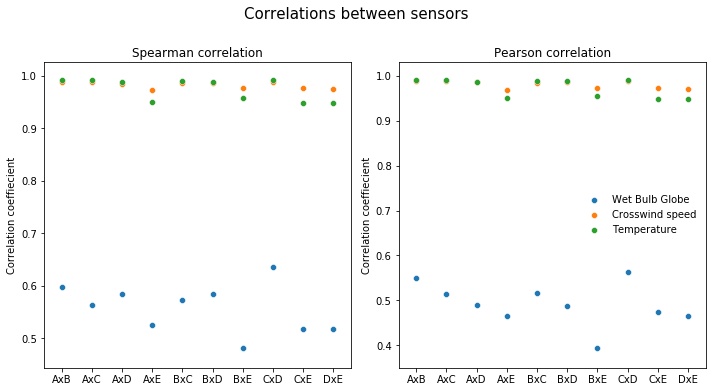

In [41]:
x = list(spearman_dict_C.keys())
y_cs = list(spearman_dict_C.values())
y_ts = list(spearman_dict_T.values())
y_ws = list(spearman_dict_W.values())
y_cp = list(pearson_dict_C.values())
y_tp = list(pearson_dict_T.values())
y_wp = list(pearson_dict_W.values())

fig , axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))

plt.sca(axes[0])
ax = sns.scatterplot(x, y_cs)
ax = sns.scatterplot(x, y_ts)
ax = sns.scatterplot(x, y_ws)
ax.set(ylabel = 'Correlation coeffiecient')
plt.title('Spearman correlation')

plt.sca(axes[1])
ax = sns.scatterplot(x, y_cp)
ax = sns.scatterplot(x, y_tp)
ax = sns.scatterplot(x, y_wp)
ax.set(ylabel = 'Correlation coeffiecient')
plt.title('Pearson correlation')

plt.legend(labels=['Wet Bulb Globe', 'Crosswind speed', 'Temperature'], frameon=False)

plt.tight_layout()
fig.suptitle('Correlations between sensors', fontsize = 15, y = 1.08)

plt.savefig('Pearson and Spearman correlations') 

## A4

In [42]:
#CDFs 

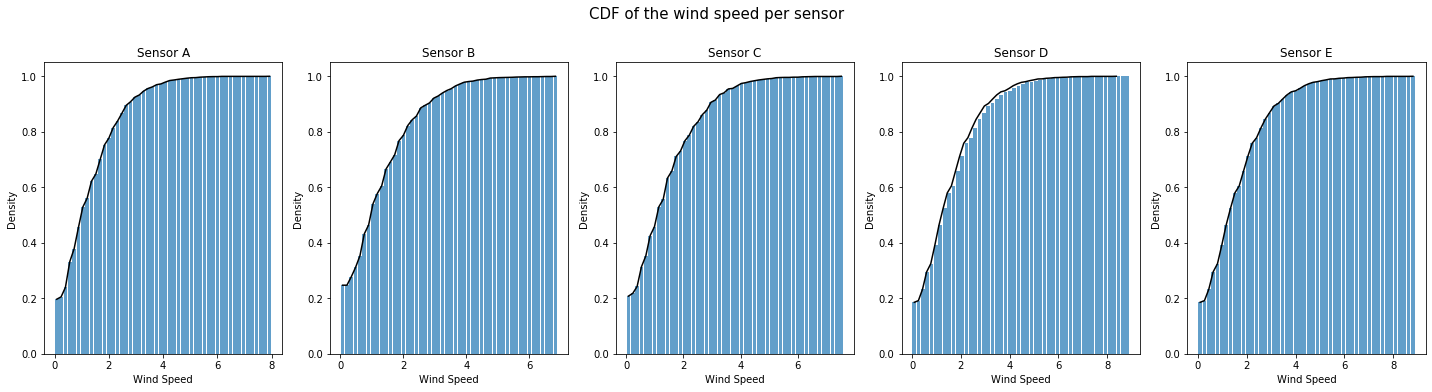

In [43]:
fig , axes = plt.subplots(nrows = 1, ncols = 5, figsize=(20,5))
plt.sca(axes[0])
a1 = plt.hist(x=sensor_a['Wind Speed'], bins=50, cumulative=True, density = True, alpha=0.7, rwidth=0.85)
plt.plot(a1[1][1:]-(a1[1][1:]-a1[1][:-1])/2,a1[0], color='k')
plt.title('Sensor A')
plt.xlabel('Wind Speed')
plt.ylabel('Density')

plt.sca(axes[1])
b1 = plt.hist(x=sensor_b['Wind Speed'], bins=50, cumulative=True, density = True, alpha=0.7, rwidth=0.85)
plt.plot(b1[1][1:]-(b1[1][1:]-b1[1][:-1])/2,b1[0], color='k')
plt.title('Sensor B')
plt.xlabel('Wind Speed')
plt.ylabel('Density')

plt.sca(axes[2])
c1 = plt.hist(x=sensor_c['Wind Speed'], bins=50, cumulative=True, density = True, alpha=0.7, rwidth=0.85)
plt.plot(c1[1][1:]-(c1[1][1:]-c1[1][:-1])/2,c1[0], color='k')
plt.title('Sensor C')
plt.xlabel('Wind Speed')
plt.ylabel('Density')

plt.sca(axes[3])
d1 = plt.hist(x=sensor_d['Wind Speed'], bins=50, cumulative=True, density = True ,alpha=0.7, rwidth=0.85)
plt.plot(d1[1][1:]-(d1[1][1:]-a1[1][:-1])/2,d1[0], color='k')
plt.title('Sensor D')
plt.xlabel('Wind Speed')
plt.ylabel('Density')

plt.sca(axes[4])
e1 = plt.hist(x=sensor_d['Wind Speed'], bins=50, cumulative=True, density = True, alpha=0.7, rwidth=0.85)
plt.plot(e1[1][1:]-(e1[1][1:]-e1[1][:-1])/2,e1[0], color='k')
plt.title('Sensor E')
plt.xlabel('Wind Speed')
plt.ylabel('Density')

plt.tight_layout()
fig.suptitle('CDF of the wind speed per sensor', fontsize = 15, y = 1.08)
plt.savefig('CDF of Wind Speed per sensor') 

In [44]:
sensor_list = ['A', 'B', 'C', 'D', 'E']

In [45]:
sensor_names = [sensor_a, sensor_b, sensor_c, sensor_d, sensor_e]
lower_list = []
upper_list = []

for sensor in sensor_names: 
    mean = np.mean(sensor['Temperature'])
    std = np.std(sensor['Temperature'])
    sample_size = len(sensor['Temperature'])
    lower, upper = stats.t.interval(0.95, sample_size-1, loc=mean, scale= std)

    lower_list.append(lower)
    upper_list.append(upper)
    

In [46]:
df_temp_intervals = pd.DataFrame([sensor_list, lower_list, upper_list]).transpose()

In [47]:
df_temp_intervals.columns = ['Sensor', 'Lower boundary', 'Upper boundary']

In [48]:
df_temp_intervals

,Sensor,Lower boundary,Upper boundary
0,A,10.1603,25.7779
1,B,10.0706,26.0602
2,C,10.0455,25.7808
3,D,10.1284,25.8643
4,E,9.79851,26.9094


In [49]:
df_temp_intervals.to_csv('confidence_intervals_temperatures.csv')

In [67]:

lower_list_WS = []
upper_list_WS = []

for sensor in sensor_names: 
    mean = np.mean(sensor['Wind Speed'])
    std = np.std(sensor['Wind Speed'])
    sample_size = len(sensor['Wind Speed'])
    lower, upper = stats.t.interval(0.95, sample_size-1, loc=mean, scale= std)
    if lower < 0: 
        lower = 0
        
    lower_list_WS.append(lower)
    upper_list_WS.append(upper)
    
df_windspeed_intervals = pd.DataFrame([sensor_list, 
                                  lower_list_WS, 
                                  upper_list_WS]).transpose()
df_windspeed_intervals.columns = ['Sensor', 'Lower boundary', 
                                  'Upper boundary']


In [68]:
df_windspeed_intervals.to_csv('confidence_intervals_windspeed_95.csv')

In [89]:
sensor_names = [sensor_a, sensor_b, sensor_c, sensor_d, sensor_e]
lower_list_WS = []
upper_list_WS = []

for sensor in sensor_names: 
    mean = np.mean(sensor['Wind Speed'])
    std = np.std(sensor['Wind Speed'])
    sample_size = len(sensor['Wind Speed'])
    lower, upper = stats.t.interval(0.70, sample_size-1, loc=mean, scale= std)
    if lower < 0: 
        lower = 0
        
    lower_list_WS.append(lower)
    upper_list_WS.append(upper)
    
df_windspeed_intervals_70 = pd.DataFrame([sensor_list, 
                                  lower_list_WS, 
                                  upper_list_WS]).transpose()
df_windspeed_intervals_70.columns = ['Sensor', 'Lower boundary', 
                                  'Upper boundary']

df_windspeed_intervals_70.to_csv('confidence_intervals_windspeed_70.csv')

In [90]:
df_windspeed_intervals_70

,Sensor,Lower boundary,Upper boundary
0,A,0.130995,2.44962
1,B,0.0597173,2.42453
2,C,0.131661,2.61127
3,D,0.214561,2.94874
4,E,0,1.3373


In [53]:
percentile5 = np.percentile(Wind_speed.A, 20)
percentile5

0.3

In [54]:
percentile95 = np.percentile(Wind_speed.A, 95)
percentile95


3.4

#### Hypothesis test 

In [60]:
# Temperature 

inverted_sensor_list = ['E', 'D', 'C', 'B', 'A']

In [61]:
hypothesis_dict_T = {}
for sensor1 in inverted_sensor_list: 
    if sensor1 != 'A':
        values_list = []
        index = inverted_sensor_list.index(sensor1)
        sensor2 = inverted_sensor_list[index + 1]
        t, p = stats.ttest_rel(Temperature[sensor1], Temperature[sensor2])
        print(sensor1, '-', sensor2, 't: ', t, ' p: ', p)
        values_list.append(t)
        values_list.append(p)
        key = sensor1 + '-' + sensor2
        hypothesis_dict_T[key] = values_list

E - D t:  16.750465454164768  p:  9.731063787480069e-60
D - C t:  6.874584572676161  p:  7.843074290243711e-12
C - B t:  -10.581245937762523  p:  1.2737070195795088e-25
B - A t:  7.597953292274317  p:  4.240332134370121e-14


In [62]:
hypothesis_dict_T

{'E-D': [16.750465454164768, 9.731063787480069e-60],
 'D-C': [6.874584572676161, 7.843074290243711e-12],
 'C-B': [-10.581245937762523, 1.2737070195795088e-25],
 'B-A': [7.597953292274317, 4.240332134370121e-14]}

In [63]:
hypo_test = pd.DataFrame.from_dict(hypothesis_dict_T).transpose()

In [64]:
hypo_test.columns = ['t-statistic', 'p-value']

In [65]:
hypo_test.to_csv('hypothesis_test.csv')

### Bonus

In [110]:
sensor_a_t = sensor_a[['FORMATTED DATE-TIME', 'Temperature']]
grouped_a = sensor_a_t.set_index('FORMATTED DATE-TIME').groupby(pd.Grouper(freq='D')).mean()

In [111]:
sensor_b_t = sensor_b[['FORMATTED DATE-TIME', 'Temperature']]
grouped_b = sensor_b_t.set_index('FORMATTED DATE-TIME').groupby(pd.Grouper(freq='D')).mean()

In [112]:
sensor_c_t = sensor_c[['FORMATTED DATE-TIME', 'Temperature']]
grouped_c = sensor_c_t.set_index('FORMATTED DATE-TIME').groupby(pd.Grouper(freq='D')).mean()

In [113]:
sensor_d_t = sensor_d[['FORMATTED DATE-TIME', 'Temperature']]
grouped_d = sensor_d_t.set_index('FORMATTED DATE-TIME').groupby(pd.Grouper(freq='D')).mean()

In [114]:
sensor_e_t = sensor_e[['FORMATTED DATE-TIME', 'Temperature']]
grouped_e = sensor_e_t.set_index('FORMATTED DATE-TIME').groupby(pd.Grouper(freq='D')).mean()

In [118]:
grouped_a.nsmallest(2, 'Temperature')

,Temperature
FORMATTED DATE-TIME,
2020-06-10,14.155556
2020-07-08,14.436111


In [119]:
grouped_b.nsmallest(2, 'Temperature')

,Temperature
FORMATTED DATE-TIME,
2020-06-10,14.327778
2020-07-08,14.343056


In [120]:
grouped_c.nsmallest(2, 'Temperature')

,Temperature
FORMATTED DATE-TIME,
2020-06-10,14.266667
2020-07-08,14.436111


In [121]:
grouped_d.nsmallest(2, 'Temperature')

,Temperature
FORMATTED DATE-TIME,
2020-06-10,14.370833
2020-07-08,14.383333


In [122]:
grouped_e.nsmallest(2, 'Temperature')

,Temperature
FORMATTED DATE-TIME,
2020-07-08,14.490278
2020-06-10,14.613889


In [123]:
grouped_a.nlargest(2, 'Temperature')

,Temperature
FORMATTED DATE-TIME,
2020-06-26,25.183333
2020-06-25,24.709722


In [124]:
grouped_b.nlargest(2, 'Temperature')

,Temperature
FORMATTED DATE-TIME,
2020-06-26,24.929167
2020-06-25,24.904167


In [125]:
grouped_c.nlargest(2, 'Temperature')

,Temperature
FORMATTED DATE-TIME,
2020-06-26,24.872222
2020-06-25,24.870833


In [126]:
grouped_d.nlargest(2, 'Temperature')

,Temperature
FORMATTED DATE-TIME,
2020-06-26,24.875000
2020-06-25,24.809722


In [127]:
grouped_e.nlargest(2, 'Temperature')

,Temperature
FORMATTED DATE-TIME,
2020-06-25,25.911111
2020-06-26,25.658333


In [25]:
2 * np.cbrt(2476)

27.057035353865277

In [24]:
len(sensor_a['Temperature'])

2476